In [12]:
from codes.data_loader import load_data
from codes.alg import tpr_parity_opt
from codes.metrics import fairness_visibility, accuracy, group_fairness
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
def generat_result(h,y,prt_group, W):
    acc = accuracy(h,y)
    tpg ,_,_,_ = group_fairness(y, h, prt_group, return_gap = True)
    fv0, fv1, _, =fairness_visibility(W ,y, h, prt_group, output= True)
    print("   Accuracy: {:.4f} | TPR Disparity: {:.4f} | Visibility group 0: {:.4f} | Visibility group 1: {:.4f}".format(acc, tpg, fv0, fv1))
    return acc, tpg, fv0, fv1

def perceptions(W ,y, h, eps = 1e-12 ):
    return W.dot(h)<=h+eps

In [38]:
model_f = list()
model_t = list()
original_f = list()
original_t = list()
for year in [2020]:

    print('year',year)
    h = tpr_parity_opt(W,y,h_c,prt_t)
    print('Orginal Decisions(Top univeristies):')
    original_t.append(generat_result(h_c,y,prt_t, W))
    print('Proposed method(Top univeristies):')
    model_t.append(generat_result(h,y,prt_t, W))
    h = tpr_parity_opt(W,y,h_c,prt_f)
    print('Orginal Decisions(Famous authors)')
    original_f.append(generat_result(h_c,y,prt_f, W))
    print('Proposed method(Famous authors):')
    model_f.append(generat_result(h,y,prt_f, W))
    print()

year 2019
Orginal Decisions(Top univeristies):
   Accuracy: 0.7910 | TPR Disparity: 0.0199 | Visibility group 0: 0.6000 | Visibility group 1: 0.6818
Proposed method(Top univeristies):
   Accuracy: 0.9005 | TPR Disparity: 0.0053 | Visibility group 0: 0.7000 | Visibility group 1: 0.7273
Orginal Decisions(Famous authors)
   Accuracy: 0.7910 | TPR Disparity: 0.0473 | Visibility group 0: 0.6126 | Visibility group 1: 0.6957
Proposed method(Famous authors):
   Accuracy: 0.9005 | TPR Disparity: 0.0064 | Visibility group 0: 0.6967 | Visibility group 1: 0.8116



## 2020

In [42]:
adj, y, h_c , prt_f, prt_t, W = load_data( year = 2020)
g = nx.from_numpy_array(adj)
pos = nx.spring_layout(g)
h = tpr_parity_opt(W,y,h_c,prt_f)

#### Percpetion of original Conference Decisions

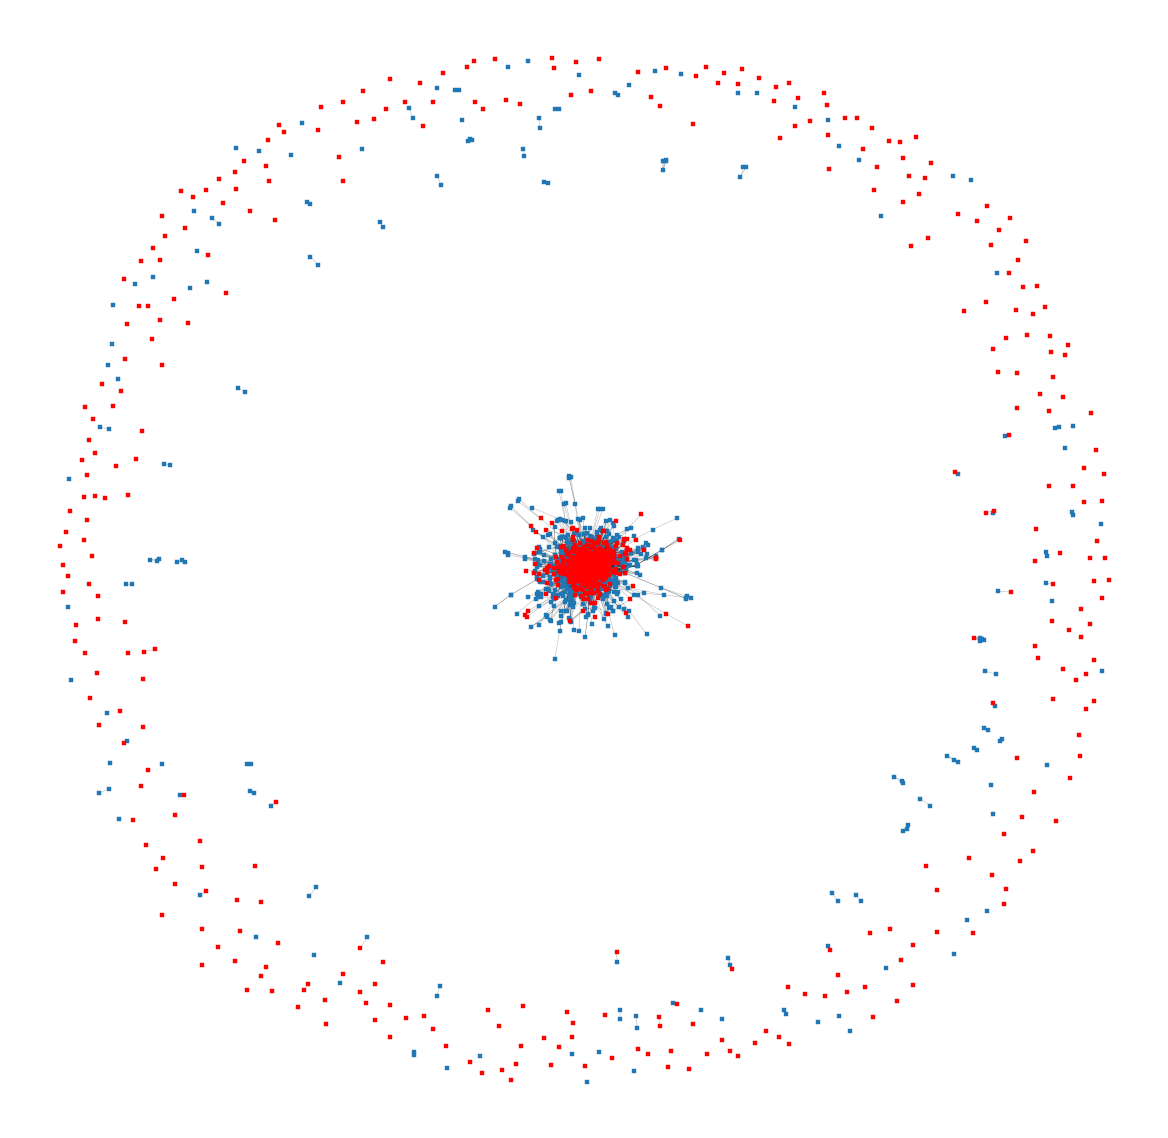

In [43]:
fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h_c))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h_c))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

#### Percpetion of recommended Decisions

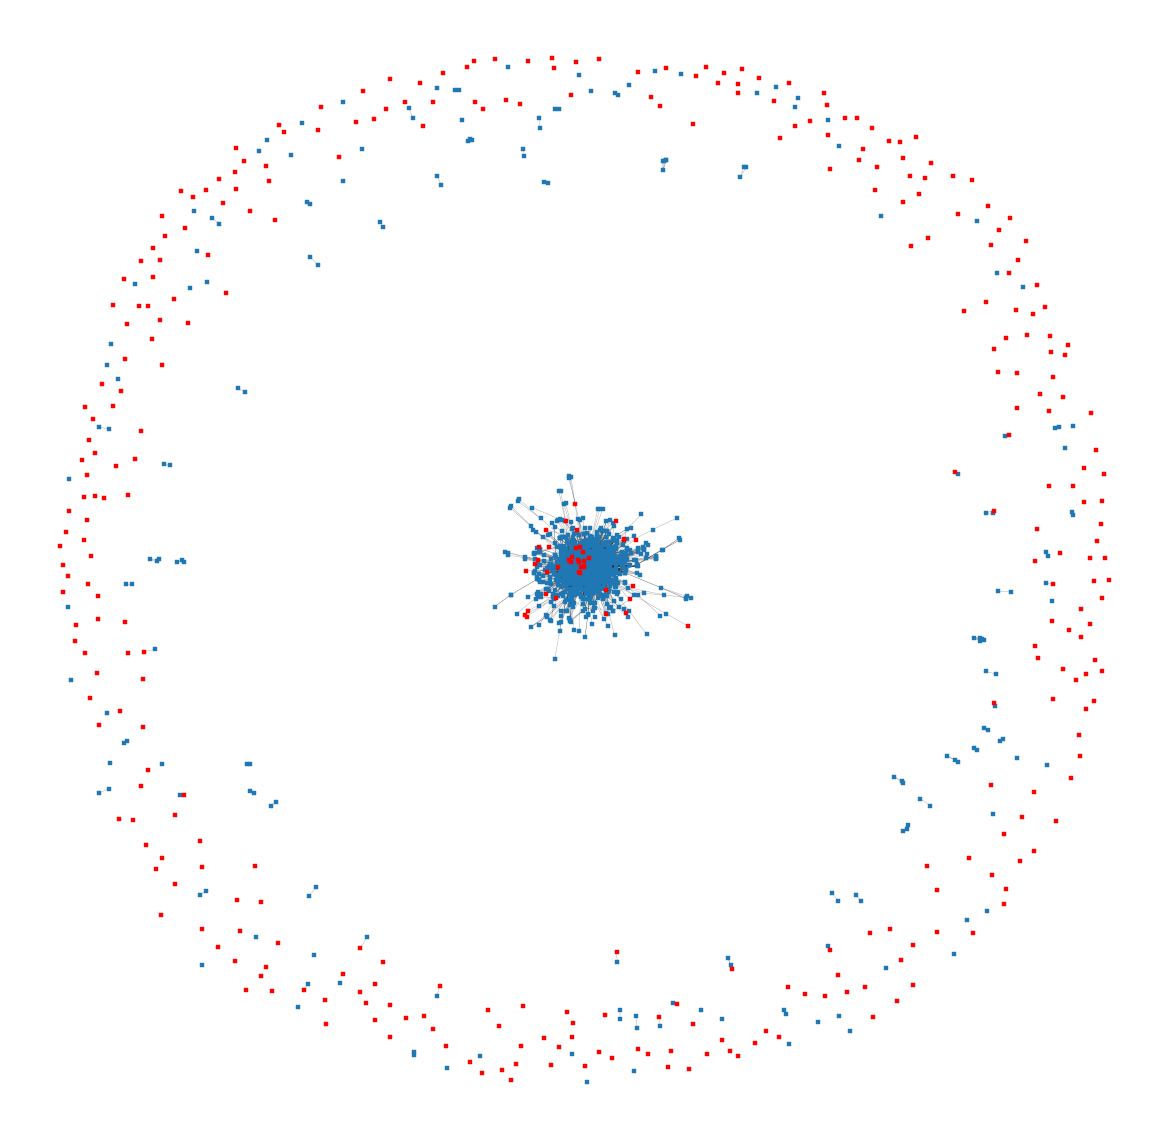

In [44]:

#pos = nx.spring_layout(g)

fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

## 2019

In [45]:
adj, y, h_c , prt_f, prt_t, W = load_data( year = 2019)
g = nx.from_numpy_array(adj)
pos = nx.spring_layout(g)
h = tpr_parity_opt(W,y,h_c,prt_f)

#### Percpetion of original Conference Decisions

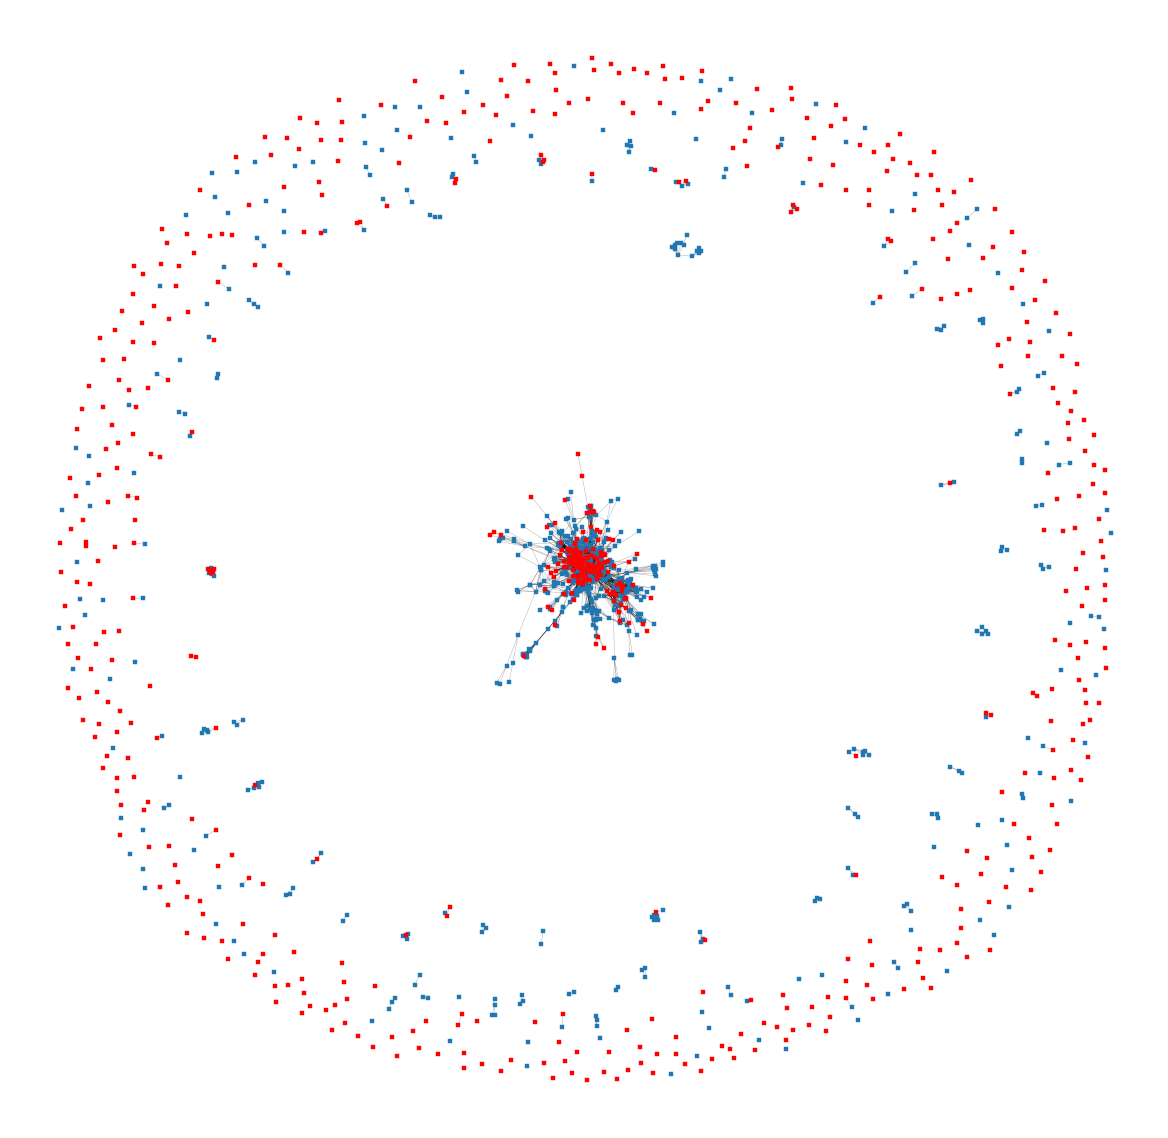

In [40]:
fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h_c))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h_c))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

#### Percpetion of recommended Decisions

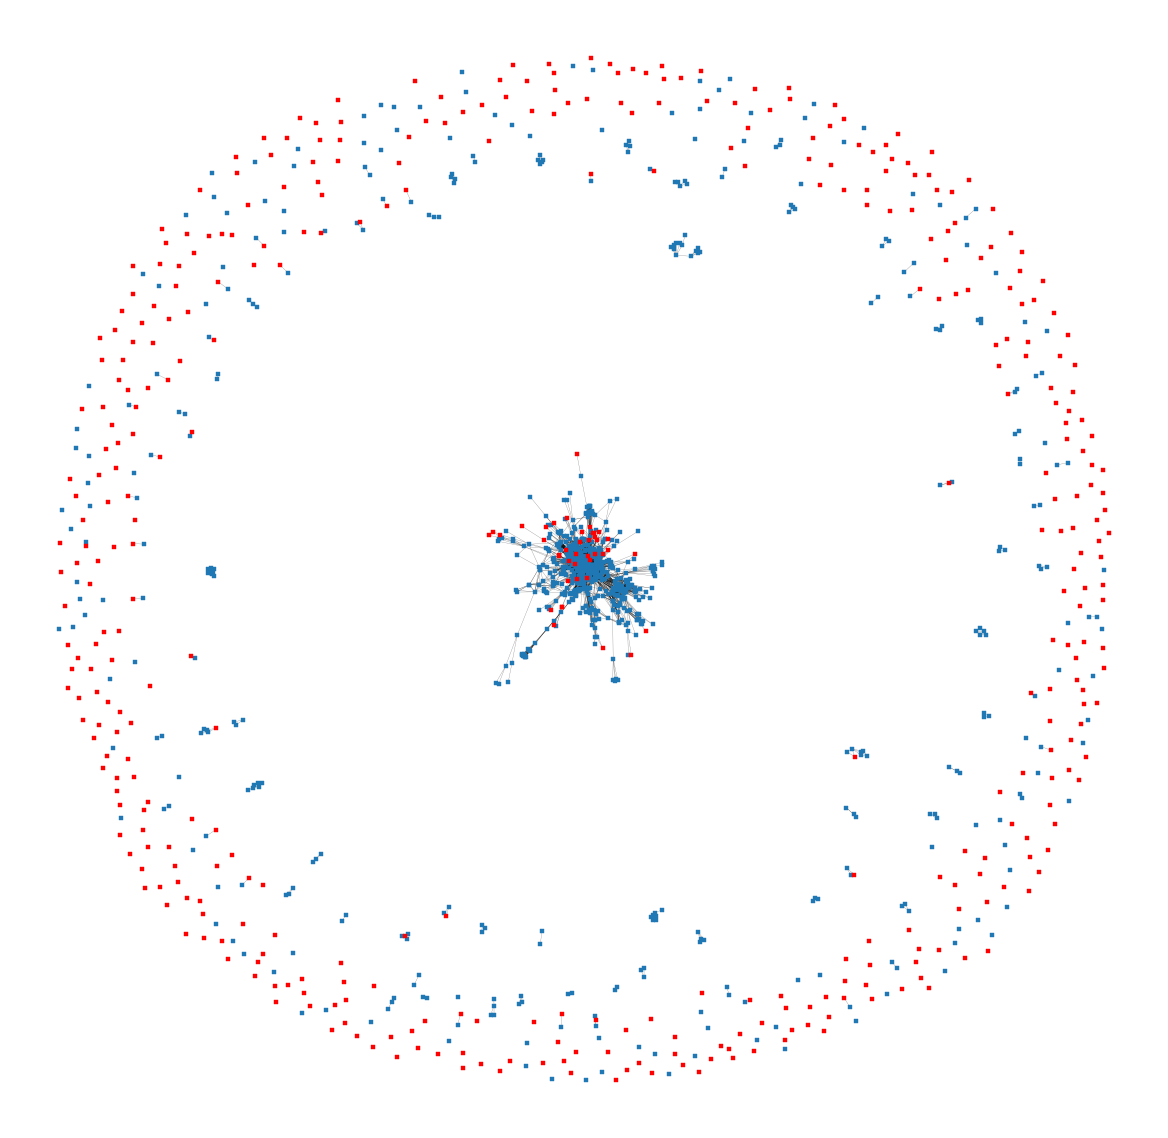

In [41]:

#pos = nx.spring_layout(g)

fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

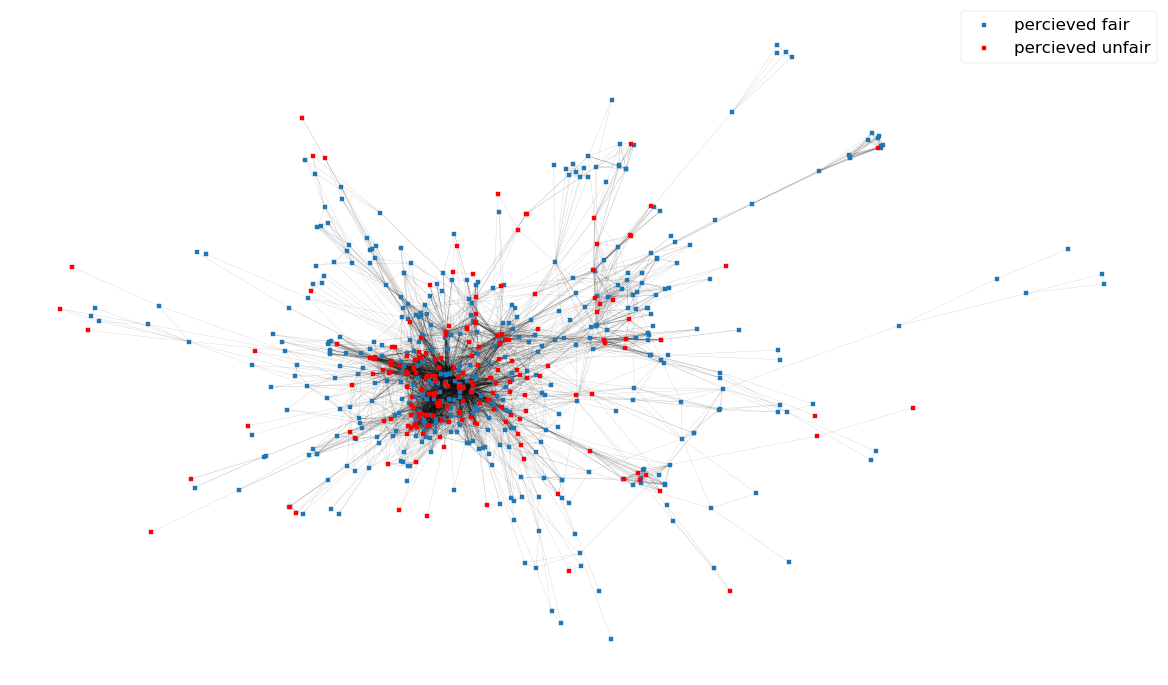

In [89]:
gc = next(nx.connected_components(g))
pf1 = set(np.where(perceptions(W ,y, h_c))[0])
pf0 = set(np.where(1-perceptions(W ,y, h_c))[0])
fig = plt.figure(num=None, figsize=(50, 30), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf1) ,node_shape='s', node_size=80, label ='percieved fair')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf0),node_shape='s',node_color = 'r' ,node_size=80, label ='percieved unfair')
nx.draw_networkx_edges(g ,pos, width= 0.4, alpha=0.4)
plt.legend(fontsize = 40)
plt.savefig('ICLR19_conf.png')
plt.show()

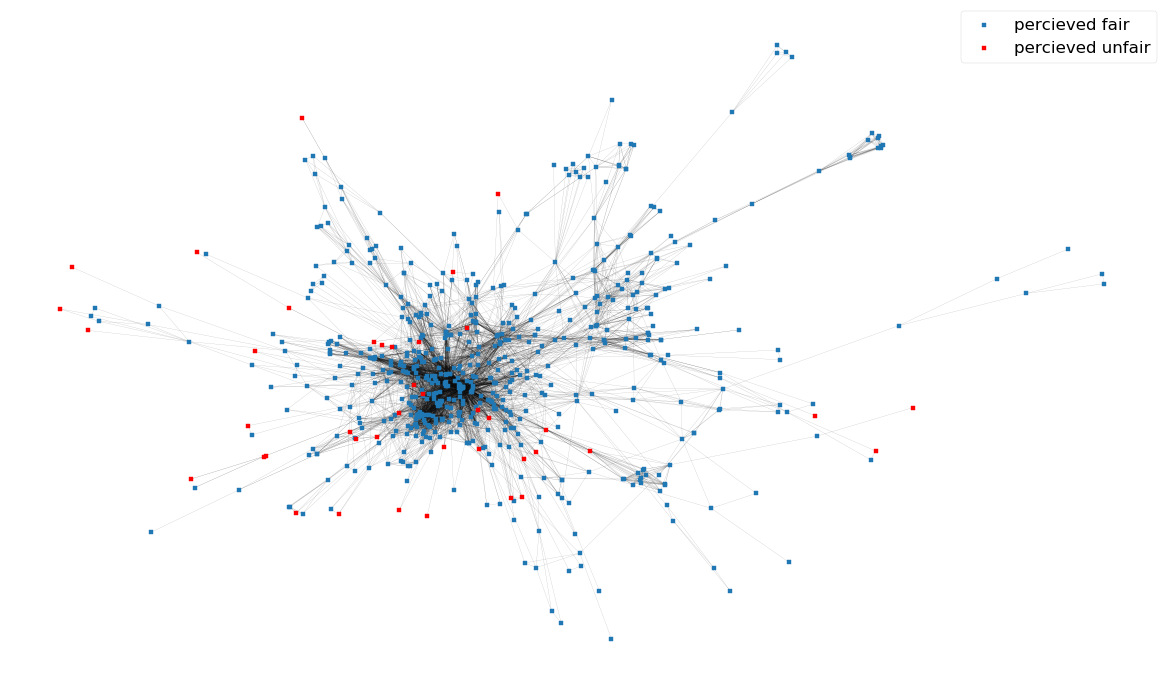

In [88]:
gc = next(nx.connected_components(g))
pf1 = set(np.where(perceptions(W ,y, h))[0])
pf0 = set(np.where(1-perceptions(W ,y, h))[0])
fig = plt.figure(num=None, figsize=(50, 30), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf1) ,node_shape='s', node_size=80, label ='percieved fair')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf0),node_shape='s',node_color = 'r' ,node_size=80, label ='percieved unfair')
nx.draw_networkx_edges(g ,pos, width= 0.4, alpha=0.4)
plt.legend(fontsize = 40)
plt.savefig('ICLR19_rec.png')
plt.show()

## 2018

#### Percpetion of original Conference Decisions

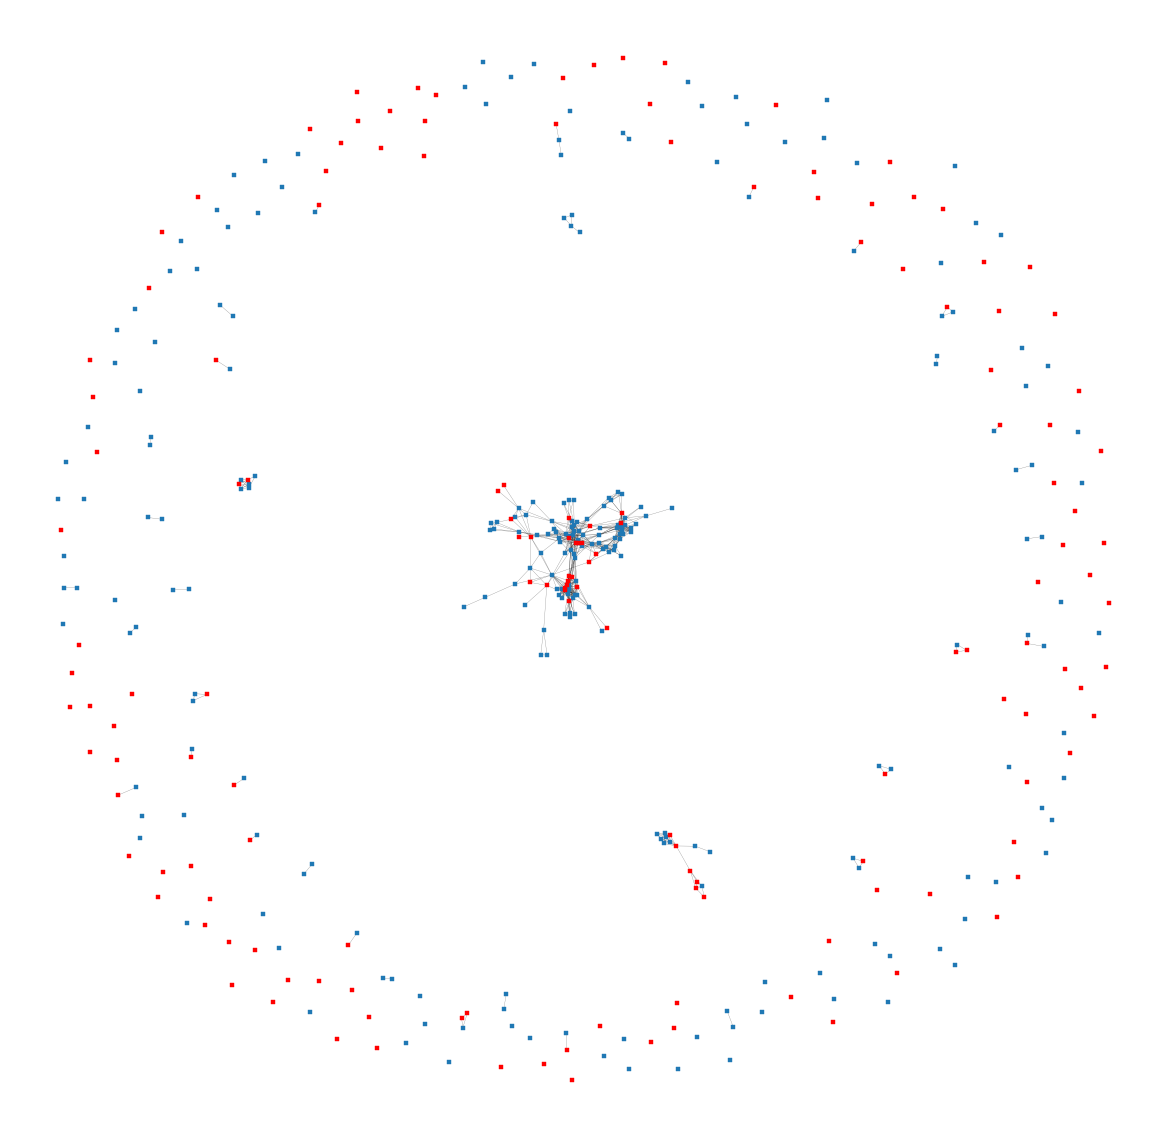

In [34]:
adj, y, h_c , prt_f, prt_t, W = load_data( year = 2018)
g = nx.from_numpy_array(adj)
pos = nx.spring_layout(g)

fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h_c))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h_c))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

#### Percpetion of recommended Decisions

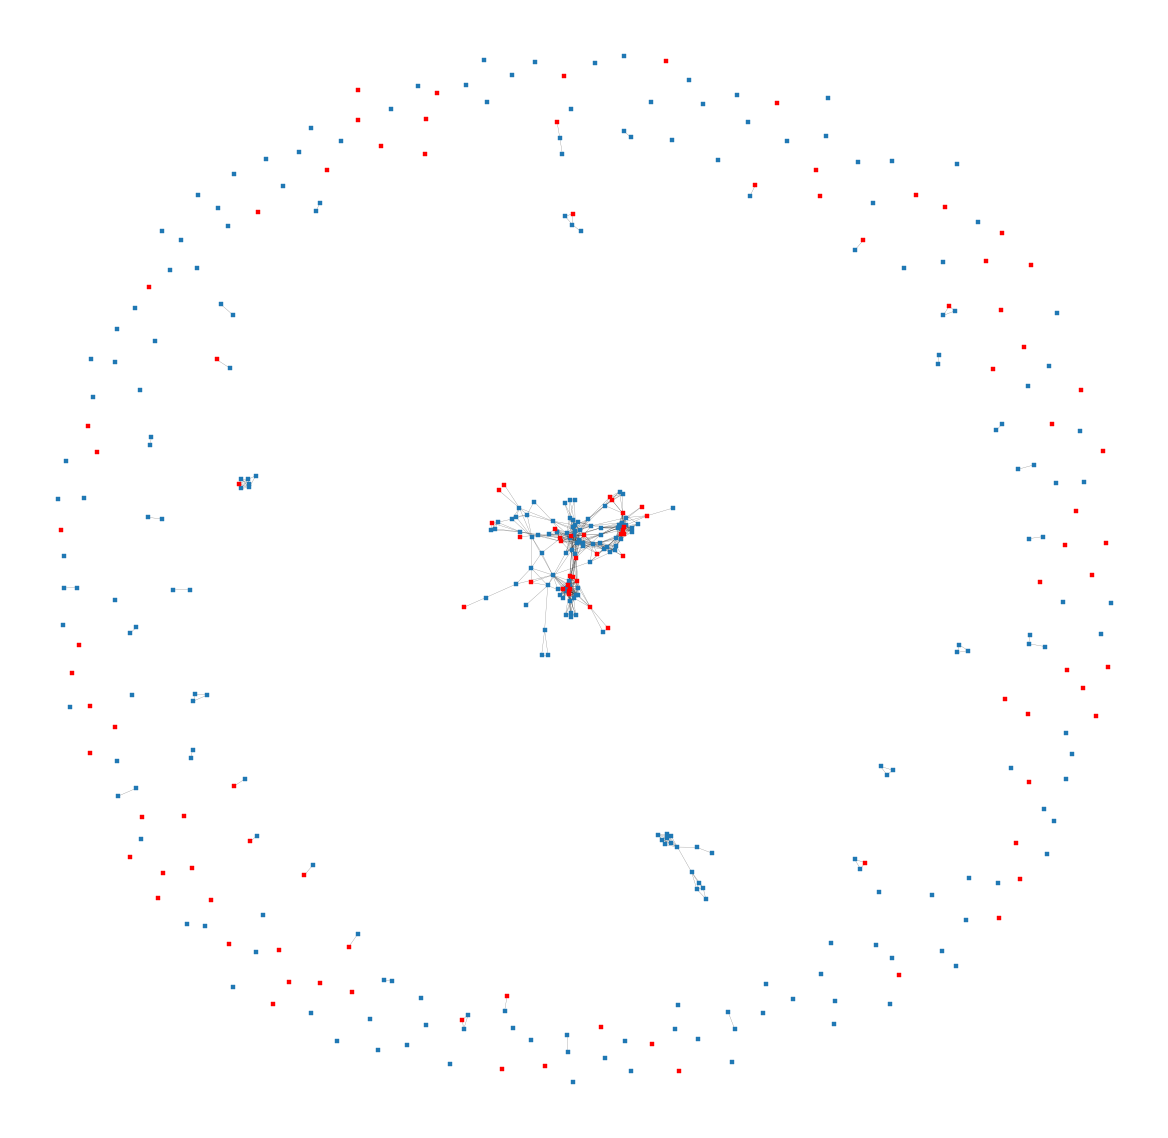

In [35]:
g = nx.from_numpy_array(adj)
#pos = nx.spring_layout(g)
h = tpr_parity_opt(W,y,h_c,prt_f)
fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()